## Useful imports

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import mplcyberpunk
import seaborn as sns

In [40]:
plt.style.use("cyberpunk")

In [22]:
data=pd.read_csv('cv_programmers.csv')

In [4]:
data

,Unnamed: 0,id,abilympics_inspection_status,abilympics_participation,worldskills_inspection_status,state_region_code,regionNameTerm,position_name,date_create,date_modify,...,workExperienceList,educationList,additionalEducationList,desirableRelocationRegions,contactList,worldskills,languageKnowledge,hardSkills,softSkills,localityName
0,44,02f70fc0-5142-11ec-b050-1b29d3b53cbb,UNKNOWN,False,NOT_APPLICABLE,6100000000000,NaN,Техник-программист,2021-11-29T21:27:30+0300,2021-11-29T21:29:16+0300,...,"[{""company_name"": ""Индивидуальный предпринимат...","[{""diploma_name"": ""Проектирование и разработка...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Английский"", ""level"": ""Чте...",[],[],"Ростовская-область,-г.-Ростов-на-Дону"
1,54,02f6df20-3b3d-11ec-a60c-839f0d9a4379,UNKNOWN,False,NOT_APPLICABLE,7800000000000,NaN,Программист,2021-11-01T20:56:17+0300,2021-11-28T19:12:25+0300,...,"[{""company_name"": ""Corbina Telecom"", ""date_fro...","[{""graduate_year"": 1995, ""institute_name"": ""Шк...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Русский"", ""level"": ""Родной...",[],[],г.-Санкт-Петербург
2,294,02efefb0-0e43-11ed-81ab-7fb917d16256,UNKNOWN,False,NOT_APPLICABLE,5600000000000,NaN,Программист,2022-07-28T10:00:49+0300,2022-07-29T10:30:56+0300,...,"[{""company_name"": ""КФКСТ и МП г. Медногорска"",...","[{""graduate_year"": 2020, ""institute_name"": ""мб...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Французский"", ""level"": ""Ба...","[{""hard_skill_name"": ""стрессоустойчивость"", ""o...","[{""owner_id"": ""02efefb0-0e43-11ed-81ab-7fb917d...","Оренбургская-область,-г.-Медногорск"
3,415,02ec5b90-658a-11ed-8193-e57b87a63fa7,UNKNOWN,False,NOT_APPLICABLE,1600000000000,NaN,Программист,2022-11-16T11:38:14+0300,2022-11-16T11:38:14+0300,...,[],"[{""owner_id"": ""02ec5b90-658a-11ed-8193-e57b87a...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],[],[],[],"Республика-Татарстан,-г.-Казань"
4,689,029ebe60-e0d0-11ec-a466-839f0d9a4379,UNKNOWN,False,NOT_APPLICABLE,5700000000000,NaN,Техник-программист,2022-05-31T13:54:14+0300,2022-05-31T13:56:04+0300,...,[],"[{""diploma_name"": ""Разработка системы дистанци...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Русский"", ""level"": ""Родной...","[{""hard_skill_name"": ""умение работать в команд...","[{""owner_id"": ""029ebe60-e0d0-11ec-a466-839f0d9...","Орловская-область,-г.-Новосиль"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,99552,010d6e90-197c-11ed-9108-fdf9f86d256a,UNKNOWN,False,NOT_APPLICABLE,3400000000000,NaN,Web-программист,2022-08-11T16:46:30+0300,2022-08-15T16:53:35+0300,...,[],"[{""graduate_year"": 2020, ""institute_name"": ""МО...",[],"[{""owner_id"": ""010d6e90-197c-11ed-9108-fdf9f86...","[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Русский"", ""level"": ""Базовы...",[],[],"Волгоградская-область,-г.-Волгоград"
421,99678,010a1610-ea0f-11ec-a466-839f0d9a4379,UNKNOWN,False,NOT_APPLICABLE,1600000000000,NaN,Стажёр-программист,2022-06-12T08:17:50+0300,2022-06-12T08:40:49+0300,...,"[{""company_name"": ""Общество с ограниченной отв...","[{""diploma_name"": ""Экспертная система поиска к...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Английский"", ""level"": ""Спо...","[{""hard_skill_name"": ""java"", ""owner_id"": ""010a...","[{""owner_id"": ""010a1610-ea0f-11ec-a466-839f0d9...","Республика-Татарстан,-г.-Казань"
422,99849,014be5a0-a2cd-11ed-8a5c-e57b87a63fa7,UNKNOWN,False,NOT_APPLICABLE,5800000000000,NaN,техник-программист,2023-02-02T10:41:29+0300,2023-02-02T10:41:29+0300,...,[],"[{""graduate_year"": 2019, ""institute_name"": ""МБ...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],[],[],[],"Пензенская-область,-г.-Пенза"
423,99943,014966b0-e6a6

# Creating column with mean state Salary
## It will probably help the prediction, beacuse just the name of region/ciy code doesn't provide any 'real' information

### I've constructed a small csv file which contains mean salaries for each Russian region. The data there is questionable, since all the numbers are presented by officals, who tend to "amplify" the results of their studies

In [44]:
sal=pd.read_csv('salaries.csv', sep=";")
sal.Salary = sal.Salary.apply(lambda s: s.replace(" ", ""))
sal.localityName = sal.localityName.apply(lambda s: s.replace("обл.", "область"))
sal.localityName = sal.localityName.apply(lambda s: "Республика "+s if s==s.split()[0] else s)
data.localityName = data.localityName.apply(lambda s: s.split(',')[0])
data.localityName = data.localityName.apply(lambda s: s.replace("-", " "))
data = pd.merge(sal, data, on='localityName')


# Basic data cleaning

### I like to start EDA with AutoViz to identify the most obvious columns that need the cleaning

In [78]:
from autoviz import AutoViz_Class
AV = AutoViz_Class()
dft = AV.AutoViz('cv_programmers.csv')

Shape of your Data Set loaded: (425, 48)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    48 Predictors classified...
        16 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0', 'id', 'date_create', 'date_modify', 'abilympics_inspection_status', 'regionNameTerm', 'academic_degree', 'nark_certificate', 'professional_skills', 'add_skills', 'other_certificates', 'other_info', 'publication_period', 'visibility', 'code_external_system', 'deleted']
5 numeric variables in data exceeds limit, taking top 30 variables
    List of variables selected: ['state_region_code', 'home_city_code', 'experience', 'salary', 'fullness_rate']
   Total columns > 30, too numerous to print.
To

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Unnamed: 0,int64,0.000000,100,44.000000,99955.000000,Possible ID colum: drop before modeling process.
id,object,0.000000,100,nan,nan,"Possible ID colum: drop before modeling process., 425 rare categories: Too many to list. Group them into a single category or drop the categories., high cardinality with 425 unique values: Use hash encoding or embedding to reduce dimension."
abilympics_inspection_status,object,0.000000,0,nan,nan,Zero-variance colum: drop before modeling process.
abilympics_participation,bool,0.000000,0,0.000000,1.000000,No issue
worldskills_inspection_status,object,0.000000,0,nan,nan,1 rare categories: ['WAITING']. Group them into a single category or drop the categories.
state_region_code,int64,0.000000,16,100000000000.000000,9100000000000.000000,No issue
regionNameTerm,float64,100.000000,NA,nan,nan,"425 missing values. Impute them with mean, median, mode, or a constant value such as 123."
position_name,object,0.000000,28,nan,nan,"117 rare categories: Too many to list. Group them into a single category or drop the categories., high cardinality with 123 unique values: Use hash encoding or embedding to reduce dimension."
date_create,object,0.000000,100,nan,nan,"Possible ID colum: drop before modeling process., 425 rare categories: Too many to list. Group them into a single category or drop the categories., high cardinality with 425 unique values: Use hash encoding or embedding to reduce dimension."
date_modify,object,0.000000,100,nan,nan,"Possible ID colum: drop before modeling process., 425 rare categories: Too many to list. Group them into a single category or drop the categories., high cardinality with 425 unique values: Use hash encoding or embedding to reduce dimension."


Number of All Scatter Plots = 15


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/alexander/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/alexander/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/alexander/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/alexander/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/alexander/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/alexander/nltk_data...
[nltk_data]    |   Package movie_

Could not draw wordcloud plot for localityName
All Plots done
Time to run AutoViz = 26 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


## Dropping unnessesary columns

- 'abilympics' needs to be removed, since the 'inspection' has 'Unknown' value for everyone and only 2 people participated in the olympics, thus making the column irrepresentative
- 'date_create' and 'modify_date' wouldn't give us any info about the programmer
- 'driver_licence' is column that raised some inner debate in me. It is probably not relevant for programmers, although my friend told me that he was asked to fill his driving skills in a form when applying for a backend-dev.
- 'academic_degree' duplicates the 'education' and consists of NaN values
- 'nark_certificate and inspection' got only 5 people, not representative
- 'id' is just id column
- 'publication period' is a mystery column
- 'visibility' has zero variance
- 'code_external_system' consists of NaNs
- 'deleted' has zero variance
- 'published date' will be processed to make it conform to datetime, but due to irrelevancy we will not fit it into the model
- 'other info' is useless and has not enough data
- 'worldskills' is irrelevant due to a small amount of participants
- 'region_name_term' can be deleted in favour of 'home_city_code'
- same with region_code and locality_name
- data has one Belorussian fellow, but he lives in Korolev, so we can safely delete 'rf_citizen' and 'code_country'
- 'desirable relocation regions' is not interesting, our model will not care about the desires, only about facts
- 'contact list' doesn't affect the target
- 'other certificates' are too complex to figure out
- 'status' has undecidable correlation with salary
- 'hard and soft skills' are very diverse. The only way to figure them out is with the help of LLM or some kind of LDA with a big corpus of programmers cv. I do not have access to any of that
- same story with 'position_name' although it is sad to delete it

In [ ]:

data = data.drop(['abilympics_participation','Unnamed: 0', 'abilympics_inspection_status', 'date_create', 'date_modify', 'drive_license','academic_degree', 'nark_inspection_status', 'nark_certificate', 'id', 'publication_period', 'visibility','code_external_system', 'deleted', 'worldskills_inspection_status', 'other_info', 'regionNameTerm', 'id_candidate', 'state_region_code','localityName','rf_citizen', 'code_country', 'desirableRelocationRegions', 'contactList', 'other_certificates', 'status', 'worldskills', 'hardSkills', 'softSkills', 'educationList', 'position_name', 'id_user'], axis=1)

## Encoding categorical variables and modifying the data

In [48]:
data.education=data.education.fillna('Среднее') # probably guys with NaN are just afraid to say that they haven't enrolled in a univeristy
def get_ed_level(s):
    if s=='Среднее':
        return 0.5
    if s=='Среднее-профессиональное':
        return 0.6
    if s=='Незаконченное-высшее':
        return 0.7
    if s=='Высшее':
        return  1
data.education = data.education.apply(get_ed_level)

In [49]:
data.published_date = data.published_date.str.slice(stop=10)
data.published_date = pd.to_datetime(data.published_date)
data.published_date= data.published_date.dt.strftime('%Y-%m-%d')
data.published_date = data.published_date.fillna(method='bfill') # there was one NaN

In [50]:
#creating the weigths for different types of schedule
def schedule_to_weight(s):
    schedule_dict = {
        'Полный-рабочий-день':1,
        'Гибкий-график':0.8,
        'Сменный-график': 0.8,
        'Вахтовый-метод': 0.8,
        'Ненормированный-рабочий-день': 0.7,
        'Неполный-рабочий-день':0.5
    }
    schedule_list = s.split(',')
    schedule_list = list(map(lambda s: schedule_dict[s] ,schedule_list))
    schedule_value = max(schedule_list)
    return schedule_value

In [51]:
data.schedule_type = data.schedule_type.apply(schedule_to_weight)

In [217]:
#the log is optional. It makes the data conform to gauss distribution more, but has some negative effects too
data.experience = data.experience.apply(lambda x: 0.000001 if x==0 else x)
data.experience = data.experience.apply('log')

In [52]:
# it's hard to deal with skills, so we will just mark them if they are present
data.add_skills=data.add_skills.fillna(0)
data.professional_skills = data.professional_skills.fillna(0)
data.add_skills = data.add_skills.apply(lambda x: x if x==0 else 1)
data.professional_skills = data.professional_skills.apply(lambda x: x if x==0 else 1)

In [53]:
def busy_to_weight(s):
    busy_dict ={
        'Полная-занятость':1,
        'Удаленная':0.9,
        'Частичная-занятость':0.6,
        'Стажировка': 0.5,
        'Временная': 0.5
    }
    return busy_dict[s]



In [54]:
data.busy_type = data.busy_type.apply(busy_to_weight)

In [55]:
data.business_trip = data.business_trip.apply(lambda s: 1 if s=='Готов-к-командировкам' else 0)

In [56]:
data.retraining_capability = data.retraining_capability.apply(lambda s: 1 if s=='Готов-к-переобучению' else 0)

In [223]:
#the log is once again optional
data.fullness_rate = data.fullness_rate.apply(lambda x: 0.000001 if x ==0 else x)
data.fullness_rate = data.fullness_rate.apply('log')

In [57]:

#we have codes of professions in profession list. They do not correlate with postion name, where all the values are Programmer+X.
data=data.drop('professionList', axis=1)

In [58]:

#work experience is a complex colunm. I got an idea of finding the top companies in cv's and increasing the weights of people who worked there, but we can't do that. Instead, we will find out how many jobs did people have beforehand
data.workExperienceList = data.workExperienceList.apply(lambda s: s.count('company_name'))
data=data.rename(columns={'workExperienceList':'n_jobs'})

In [59]:
data.additionalEducationList = data.additionalEducationList.apply(lambda x: 1 if len(x)>2 else 0)


In [60]:

import ast
def get_language_level(s):
    level=" "
    if len(s)==2: return 0
    s=s[1:-1]
    lang_dict =ast.literal_eval(s)
    if type(lang_dict)==tuple:
        for i in range(len(lang_dict)):
            if lang_dict[i]['code_language']=='Английский':
                level = lang_dict[i]["level"]
                break
        else:
            return 0
    else:
        if lang_dict['code_language']=='Английский':
            level = lang_dict["level"]
        else:
            return 0
    if level == "Родной":
        return 1
    if level=="Свободный":
        return 0.9
    if level=="Способен пройти собеседование":
        return 0.7
    if level=="Чтение и письмо со словарем":
        return 0.5
    if level=="Базовый":
        return 0.3
data.languageKnowledge = data.languageKnowledge.apply(get_language_level)
data = data.rename(columns={'languageKnowledge': 'english_level'})

In [62]:
data = data.rename(columns={"Salary":'mean_state_salary'})

In [63]:
data.head()

,mean_state_salary,home_city_code,education,published_date,schedule_type,experience,salary,professional_skills,add_skills,busy_type,business_trip,retraining_capability,fullness_rate,n_jobs,additionalEducationList,english_level
0,116376,8900000300000,0.6,2022-07-21,1.0,2,40000,0,0,1.0,1,1,74,1,0,0.0
1,116376,8900000700000,1.0,2022-04-11,1.0,14,70000,0,0,1.0,1,1,87,7,0,0.5
2,116376,8900000600000,0.6,2022-10-07,1.0,0,40000,0,0,1.0,0,0,64,0,0,0.3
3,116376,8900300000100,0.5,2022-04-15,1.0,1,45000,0,0,1.0,1,1,65,1,0,0.0
4,112768,7700000000000,1.0,2022-02-01,1.0,1,100000,0,0,1.0,1,1,82,1,0,0.9


In [64]:
data.to_csv('progrmmers_cleaned.csv')

# EDA

In [71]:
data = pd.read_csv('progrmmers_cleaned.csv')

In [72]:
data = data.drop(columns=['Unnamed: 0'])

In [67]:

data.head()

,mean_state_salary,home_city_code,education,published_date,schedule_type,experience,salary,professional_skills,add_skills,busy_type,business_trip,retraining_capability,fullness_rate,n_jobs,additionalEducationList,english_level
0,116376,8900000300000,0.6,2022-07-21,1.0,2,40000,0,0,1.0,1,1,74,1,0,0.0
1,116376,8900000700000,1.0,2022-04-11,1.0,14,70000,0,0,1.0,1,1,87,7,0,0.5
2,116376,8900000600000,0.6,2022-10-07,1.0,0,40000,0,0,1.0,0,0,64,0,0,0.3
3,116376,8900300000100,0.5,2022-04-15,1.0,1,45000,0,0,1.0,1,1,65,1,0,0.0
4,112768,7700000000000,1.0,2022-02-01,1.0,1,100000,0,0,1.0,1,1,82,1,0,0.9


## I've found the dataset containing kladr codes. With the help of that, we can visualize, where the submissions come from

In [68]:
kladr = pd.read_csv('kladr.csv')

In [69]:
kladr=kladr[['code', 'name']]
kladr = kladr.rename(columns={'code':'home_city_code'})

In [70]:
data = pd.merge(data, kladr, on='home_city_code')

In [71]:
data.home_city_code.unique()

array([8900000300000, 8900000700000, 8900000600000, 8900300000100,
       7700000000000, 7700000200000, 8600001100000, 8600000900000,
       8600001000000, 1401800000100, 1402500100000, 1400000100000,
       1400000200000, 1402900001200, 5100000100000, 5100001300000,
       7800000000000, 7800000300000, 7800000400000, 5000003100000,
       5000002900000, 5000000000000, 5000003000000, 5000000900000,
       5000003600000, 5000002700000, 1100000100000, 2400000100000,
       2400001600000, 2400001300000, 2400000400000, 2800000200000,
       2800000100000, 2801000003300, 2700000000000, 2700000100000,
       2700000500000, 2901900100000, 2900000000000, 2900000300000,
       2901800000100, 2901300100000, 2500001100000, 2500000100000,
       2500000500000, 7200000100000, 7200100000400, 3800001000000,
       3800000300000, 3800000400000, 3800001400000, 3800001500000,
       3800001300000, 3801500100000, 3800700006100, 4700000400000,
       4700700100000, 4700900100000, 4700300002800, 7502700000

In [33]:
data.name.unique()

array(['Ростов-на-Дону', 'Санкт-Петербург', 'Медногорск', 'Казань',
       'Новосиль', 'Нижний Новгород', 'Ставрополь', 'Хонуу', 'Сёйка',
       'Тимашевск', 'Сыктывкар', 'Переславль-Залесский',
       'Республика Дагестан', 'Воронеж', 'Шенкурск', 'Сызрань', 'Грозный',
       'Челябинск', 'Еманжелинск', 'Краснозерское', 'Кольчугино',
       'Новосибирская область', 'Прокопьевск', 'Хабаровский край',
       'Псков', 'Нижний Тагил', 'Москва', 'Грачевка', 'Старый Оскол',
       'Тюмень', 'Тулун', 'Преградная', 'Шелопугино', 'Кавказский',
       'Сарапул', 'Гудермес', 'Новокуйбышевск', 'Красноярск', 'Карталы',
       'Абаза', 'Кушва', 'Бобровка', 'Пенза', 'Новосибирск',
       'Екатеринбург', 'Иркутск', 'Томск', 'Мурманск', 'Рязань',
       'Березники', 'Камышин', 'Среднеколымск', 'Ангарск', 'Тахтамукай',
       'Самарская область', 'Северск', 'Уссурийск', 'Топки',
       'Верхняя Пышма', 'Сосновый Бор', 'Великооктябрьский', 'Кадуй',
       'Набережные Челны', 'Пермь', 'Владивосток', 'Сара

### Getting coordinates of cities using API

In [74]:
API_KEY = 'HhV8m0SGJbU/zh27knajYw==aYjYyri40umf1161'
import requests
def get_lat_long(city):
    api_url = f"https://api.api-ninjas.com/v1/geocoding?city={city}&country={'Russia'}"
    response = requests.get(api_url, headers={'X-Api-Key': API_KEY})
    if response.status_code == requests.codes.ok:
        print(response.json())
    # else:
    #     print("Error:", response.status_code, response.text)
    try:
        r, t = response.json()[0]['latitude'],response.json()[0]['longitude']
    except IndexError:
        r, t = 0, 0
    return r,t

In [ ]:
coordinates = data.name.apply(get_lat_long)

In [76]:
coordinates.to_csv('coordinates.csv')

### Using Geopandas to visualize

In [49]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [53]:
coordinates = pd.read_csv('coordinates.csv')
coordinates = coordinates.drop('Unnamed: 0', axis=1)

In [ ]:

coordinates=coordinates.apply(Point)
gdf = GeoDataFrame(data, geometry=coordinates)

In [ ]:
coordinates = coordinates.apply(lambda t: (t.y, t.x))

/var/folders/9j/ltkckt2s4zsfxrks574_vgfm0000gn/T/ipykernel_38818/3906328205.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


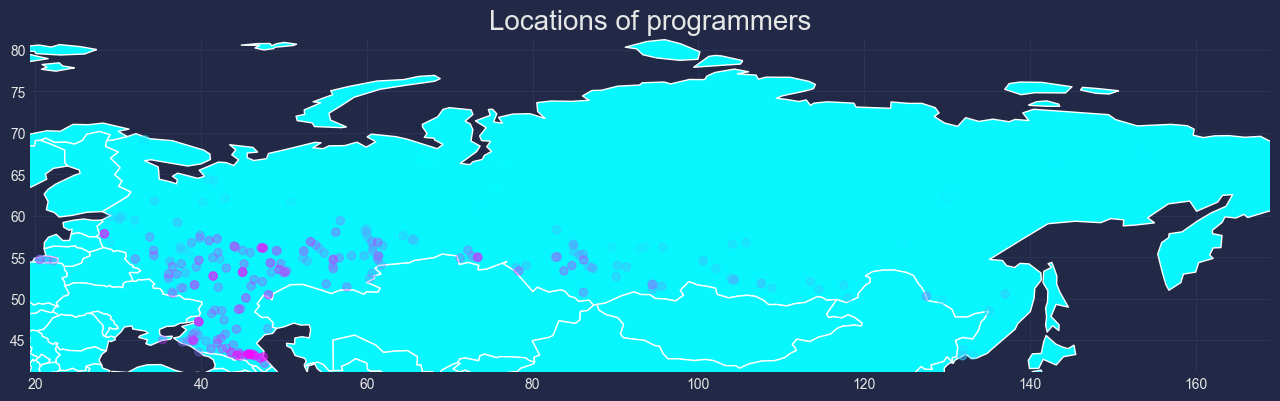

In [86]:


#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = gdf.plot(ax=world.plot(figsize=(16, 7)), marker='o', markersize=35, alpha=0.3, cmap='cool')
minx, miny, maxx, maxy = 19.38, 41.13,169.01, 81.50
fig = ax.get_figure()
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.set_title('Locations of programmers', fontsize=20)

In [87]:
fig.savefig('images/russia_geo.svg', dpi=300)

## Now we're getting to the real EDA

In [88]:
data.head()

,mean_state_salary,home_city_code,education,published_date,schedule_type,experience,salary,professional_skills,add_skills,busy_type,business_trip,retraining_capability,fullness_rate,n_jobs,additionalEducationList,english_level,name
0,116376,8900000300000,0.6,2022-07-21,1.0,2,40000,0,0,1.0,1,1,74,1,0,0.0,Лабытнанги
1,116376,8900000700000,1.0,2022-04-11,1.0,14,70000,0,0,1.0,1,1,87,7,0,0.5,Ноябрьск
2,116376,8900000600000,0.6,2022-10-07,1.0,0,40000,0,0,1.0,0,0,64,0,0,0.3,Новый Уренгой
3,116376,8900300000100,0.5,2022-04-15,1.0,1,45000,0,0,1.0,1,1,65,1,0,0.0,Аксарка
4,112768,7700000000000,1.0,2022-02-01,1.0,1,100000,0,0,1.0,1,1,82,1,0,0.9,Москва


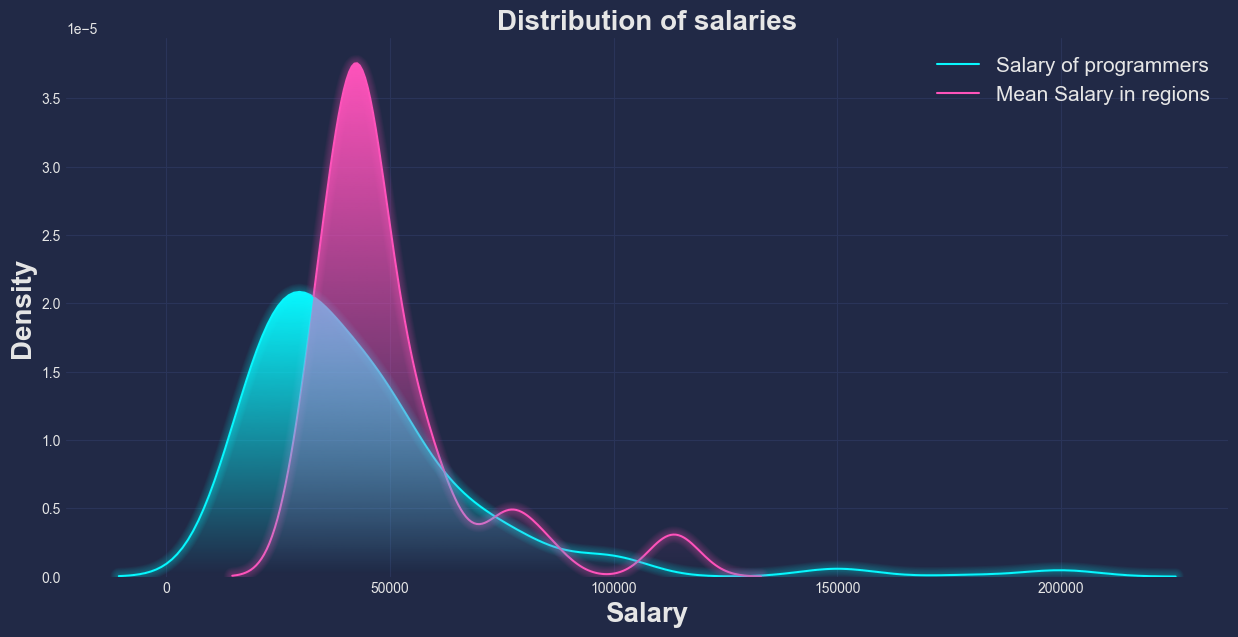

In [104]:
plt.figure(figsize=(15,7))
sns.kdeplot(data.salary)
sns.kdeplot(data.mean_state_salary)
plt.title('Distribution of salaries', fontsize=20, fontweight='bold')
plt.legend(['Salary of programmers', 'Mean Salary in regions'], fontsize=15)
plt.xlabel('Salary',fontsize=20, fontweight='bold')
plt.ylabel('Density',fontsize=20, fontweight='bold')
mplcyberpunk.add_glow_effects(gradient_fill=True)

plt.savefig('images/salary_density.svg', dpi=300)

### The first vesrion of this distribution seemed odd, so I've looked up anomalies in salary
### It appears that there was some guys who make more than 300k rubles and some who are making 0. That is not the data you want to feed the model with, so I've clipped it

In [44]:
data.salary.describe()

count       413.000000
mean      43626.595642
std       28432.497534
min       10000.000000
25%       25000.000000
50%       40000.000000
75%       50000.000000
max      200000.000000
Name: salary, dtype: float64

In [73]:
data=data.drop(data[data.salary<10000].index)
data = data.drop(data[data.salary>200000].index)

In [74]:
data.home_city_code = data.home_city_code.apply(str)

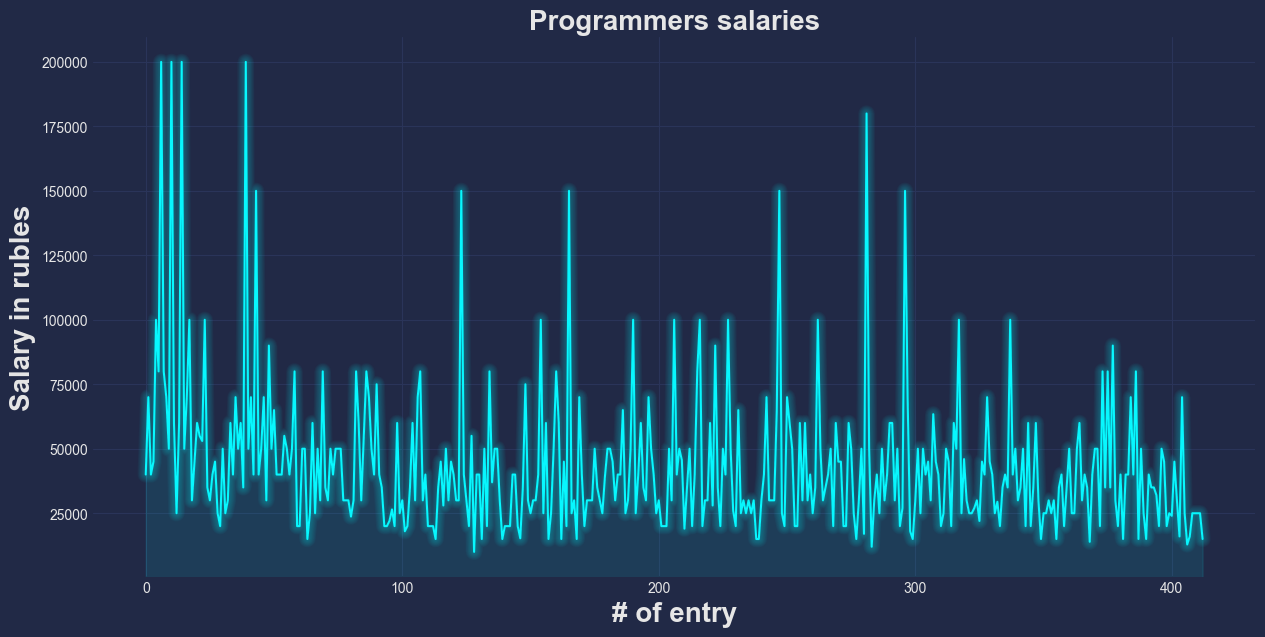

In [48]:
plt.figure(figsize=(15,7))
sns.lineplot(x=range(len(data.salary)), y=data.salary)
plt.title('Programmers salaries', fontsize=20, fontweight='bold')
plt.ylabel('Salary in rubles', fontsize=20, fontweight='bold')
plt.xlabel('# of entry', fontsize=20, fontweight='bold')

mplcyberpunk.add_glow_effects()
plt.savefig('images/salaryvsnum.svg', dpi=300)

### Now let's look at the correlation heatmap of all the values in our table

/var/folders/9j/ltkckt2s4zsfxrks574_vgfm0000gn/T/ipykernel_54278/2881824543.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(), annot=True, cmap='cool')


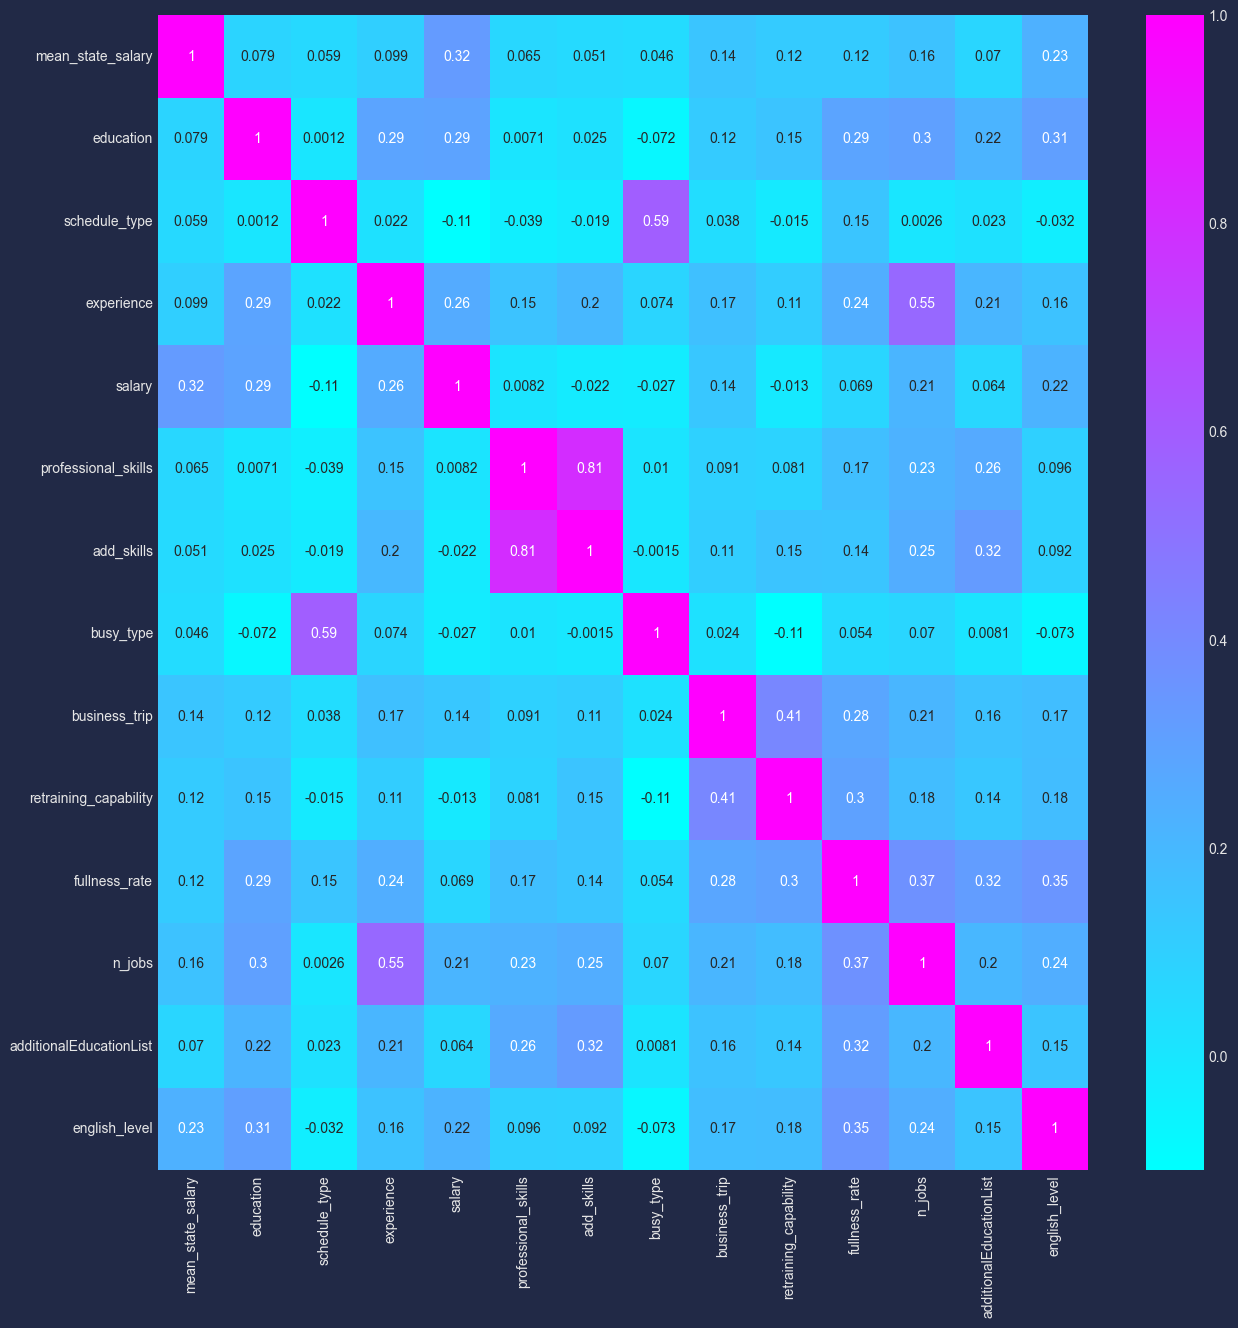

In [60]:
plt.figure(figsize=(15,15))
sns.heatmap(data=data.corr(), annot=True, cmap='cool')
plt.savefig('images/heatmap_1.svg', dpi=300)

#### From the heatmap we can see that parameters that correlate well with salary. Those are:
- english level
- education
- experience
- n_jobs
- mean_state_salary

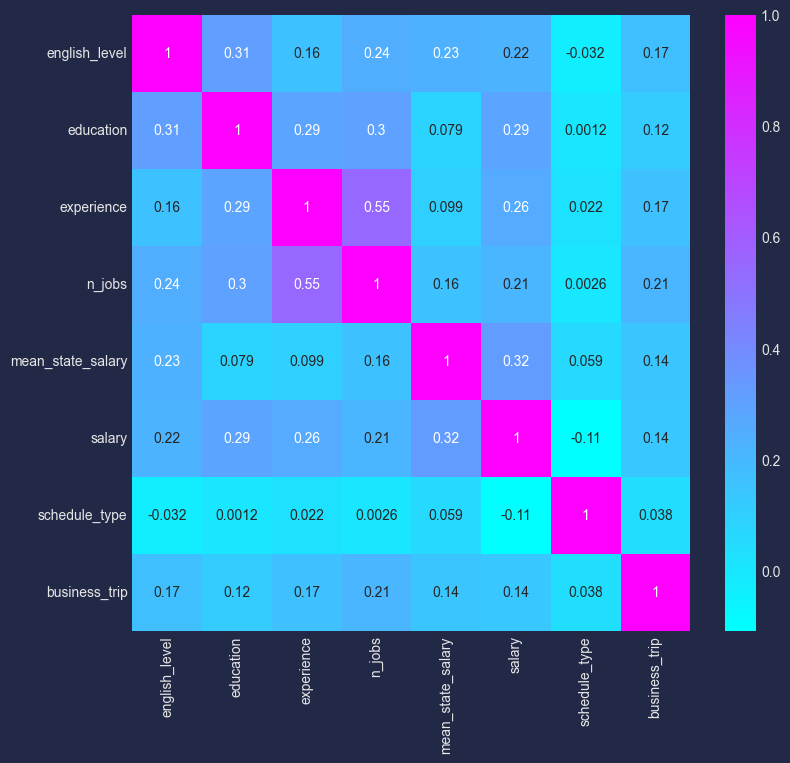

In [61]:
plt.figure(figsize=(9,8))
sns.heatmap(data=data[['english_level', 'education', 'experience', 'n_jobs', 'mean_state_salary', 'salary', 'schedule_type', 'business_trip']].corr(), annot=True, cmap='cool')
plt.savefig('images/heatmap_2.svg', dpi=300)

### Also we can see that our variables correlate with each other a bit. Even more than with the target variable

### Let's look at some fun graphs that may suit our intuition

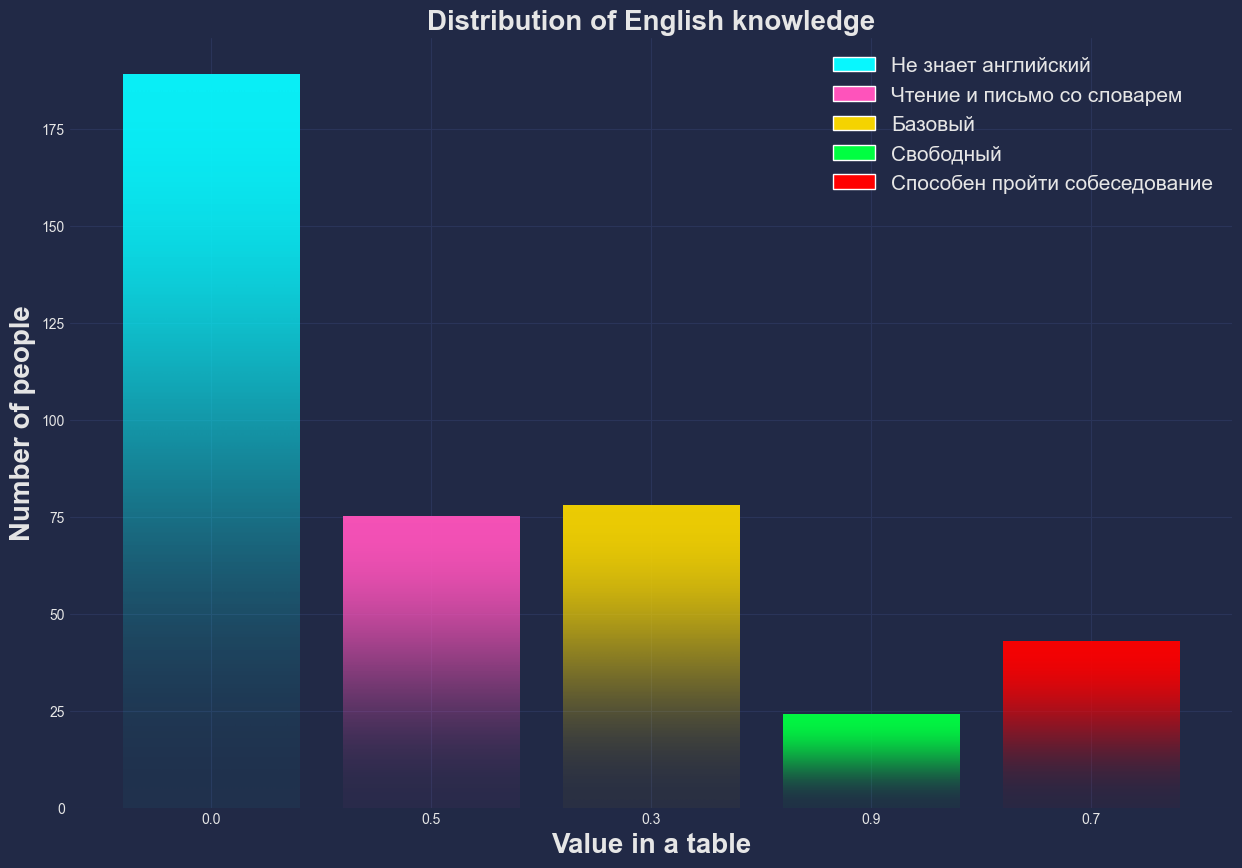

In [106]:
plt.figure(figsize=(15,10))
categories = data.english_level.unique()
str_categories = [item for item in categories.astype(str)]
values = [len(data[data.english_level==c]) for c in categories]
colors = ["C0", "C1", "C2", "C3", "C4"]
bars = plt.bar(str_categories, values,color = colors, width=0.8, align='center',label=['Не знает английский', 'Чтение и письмо со словарем', "Базовый", "Свободный", "Способен пройти собеседование"])
plt.legend(fontsize=15)
plt.title("Distribution of English knowledge", fontsize=20, fontweight='bold')
plt.xlabel('Value in a table', fontsize=20, fontweight='bold')
plt.ylabel('Number of people', fontsize=20, fontweight='bold')
mplcyberpunk.add_bar_gradient(bars=bars)
plt.savefig('images/english_knowledge_distribution.svg', dpi=300)


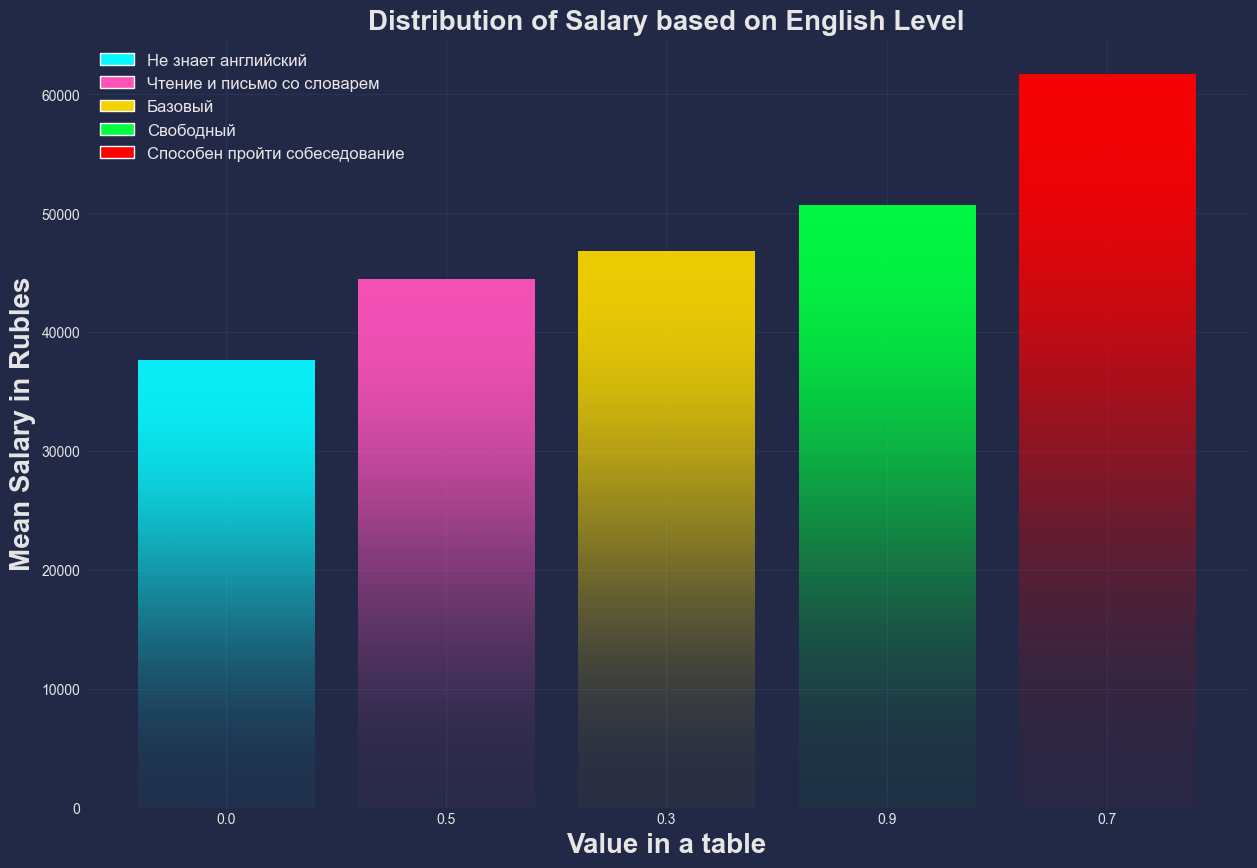

In [107]:
plt.figure(figsize=(15,10))
categories = data.english_level.unique()
str_categories = [item for item in categories.astype(str)]
values = [data[data.english_level==c].salary.mean() for c in categories]
colors = ["C0", "C1", "C2", "C3", "C4"]
bars = plt.bar(str_categories, values,color = colors, width=0.8, align='center',label=['Не знает английский', 'Чтение и письмо со словарем', "Базовый", "Свободный", "Способен пройти собеседование"])
plt.legend(fontsize=12, loc = 'upper left')
plt.title("Distribution of Salary based on English Level", fontsize=20, fontweight='bold')
plt.xlabel('Value in a table', fontsize=20, fontweight='bold')
plt.ylabel('Mean Salary in Rubles', fontsize=20, fontweight='bold')
mplcyberpunk.add_bar_gradient(bars=bars)
plt.savefig('images/salary_vs_english_distribution.svg', dpi=300)


### We can see that the better your English is, the better your payment is. It is almost true probably because of a small numer of samples

### From that scatterplot we can see that university graduates are paid more and have more experience

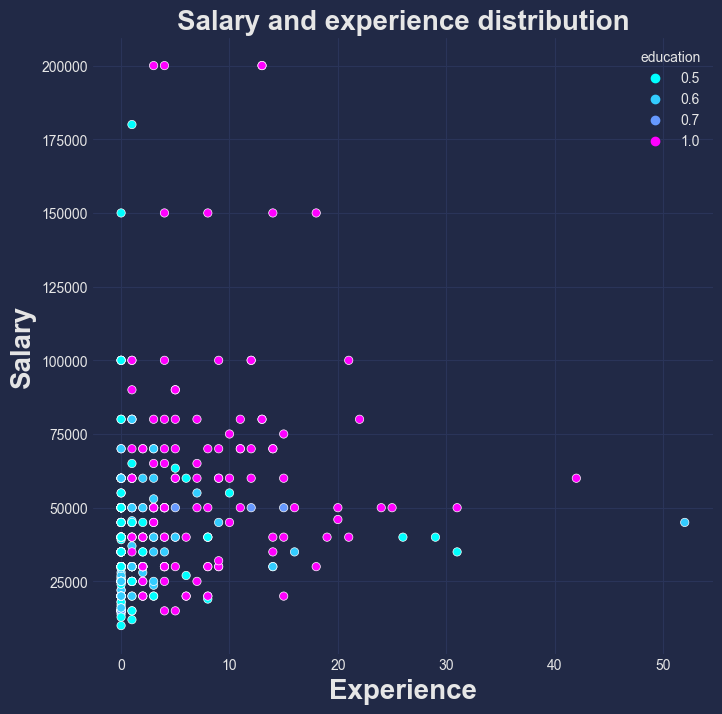

In [64]:
plt.figure(figsize=(8,8))
plt.title('Salary and experience distribution', fontsize=20, fontweight='bold')
plt.ylabel('Salary', fontsize=20, fontweight='bold')
plt.xlabel('Experience', fontsize=20, fontweight='bold')
sns.scatterplot(data=data, x='experience', y='salary', hue='education', palette='cool')
mplcyberpunk.make_scatter_glow()
plt.savefig('images/salary_vs_experience.svg', dpi=300)

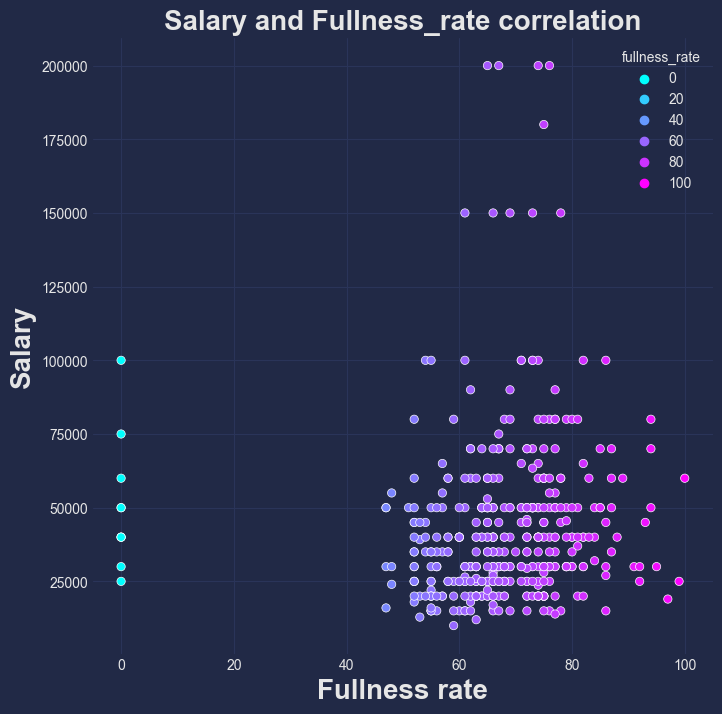

In [67]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=data, x='fullness_rate', y='salary', hue='fullness_rate', palette='cool')
plt.xlabel("Fullness rate", fontsize=20, fontweight='bold')
plt.ylabel("Salary", fontsize=20, fontweight='bold')
plt.title("Salary and Fullness_rate correlation", fontsize=20, fontweight='bold')
plt.savefig('images/fullness-salary.svg', dpi=300)
mplcyberpunk.make_scatter_glow()

# Building the model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.metrics import make_scorer
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

In [92]:
import warnings
warnings.filterwarnings('ignore')

In [101]:
X=data.drop(['salary', 'published_date'], axis=1)
Y = data['salary']
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, shuffle=False)

In [140]:
def model_visualisation(Y_test, predictions, name):
    # Create subplots with 1 row and 2 columns
    fig, axes = plt.subplots(3, 1, figsize=(12, 16))

    # Scatter plot of actual values vs predicted values
    axes[0].scatter(Y_test, predictions, alpha=0.5)
    axes[0].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], alpha=0.5, linewidth=2)
    axes[0].set_xlabel('Actual Values')
    axes[0].set_ylabel('Predicted Values')
    axes[0].set_title('Scatter Plot: Predicted vs. Actual')
    axes[0].legend(['Predicted vs. Actual','Reference Line'])




# Line plot of actual values and predicted values
    axes[1].plot(Y_test.values.ravel(), alpha=0.5, label='Actual')
    axes[1].plot(predictions, alpha=0.5, label='Predicted')
    axes[1].set_title('Line Plot: Predicted vs. Actual')
    axes[1].legend()



    axes[2].plot(Y_test.values.ravel()-predictions, alpha=0.5, label = "Difference between actual and predicted")
    axes[2].set_title('Difference between actual and predicted')
    axes[2].legend()

    plt.tight_layout()
    mplcyberpunk.add_glow_effects()


    plt.savefig('images/'+name+'.svg', dpi=300)
    plt.show()

    # Test set SMAPE
    print("Test set RMSE: ", mean_squared_error(Y_test.values.ravel(), predictions, squared=False))

In [102]:
Y_small = data['salary']
X_small = data[['english_level', 'n_jobs', 'mean_state_salary', 'experience', 'busy_type', 'schedule_type', 'education']]
X_small_train, X_small_val, Y_small_train, Y_small_val = train_test_split(X_small, Y_small, test_size=0.3, shuffle=False)


# Tuning hyperparameters

In [11]:
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.datasets import load_wine
import optuna
from optuna.samplers import TPESampler
import pickle

In [103]:
def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),

        'use_best_model': True,
        'eval_metric': "RMSE"

    }

    model = CatBoostRegressor(**params, silent=True)
    model.fit(X_train, Y_train, eval_set=[(X_val, Y_val)])
    predictions = model.predict(X_val)
    rmse = mean_squared_error(Y_val, predictions)
    return rmse




In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
sampler = TPESampler()
study = optuna.create_study(study_name="catboost", direction="minimize", sampler=sampler)
study.optimize(objective, n_trials=100)
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

In [106]:

optuna.visualization.plot_contour(study, params=['learning_rate',
                                                 'depth'])


In [107]:
optuna.visualization.plot_param_importances(study)

In [ ]:
catboost = CatBoostRegressor(iterations=200,
                             learning_rate=study.best_params['learning_rate'],
                             depth=study.best_params['depth'],
                             subsample=study.best_params['subsample'],
                             colsample_bylevel=study.best_params['colsample_bylevel'],
                             min_data_in_leaf=study.best_params['min_data_in_leaf'])
catboost.fit(X_train, Y_train)


In [120]:
predictions = catboost.predict(X_val)

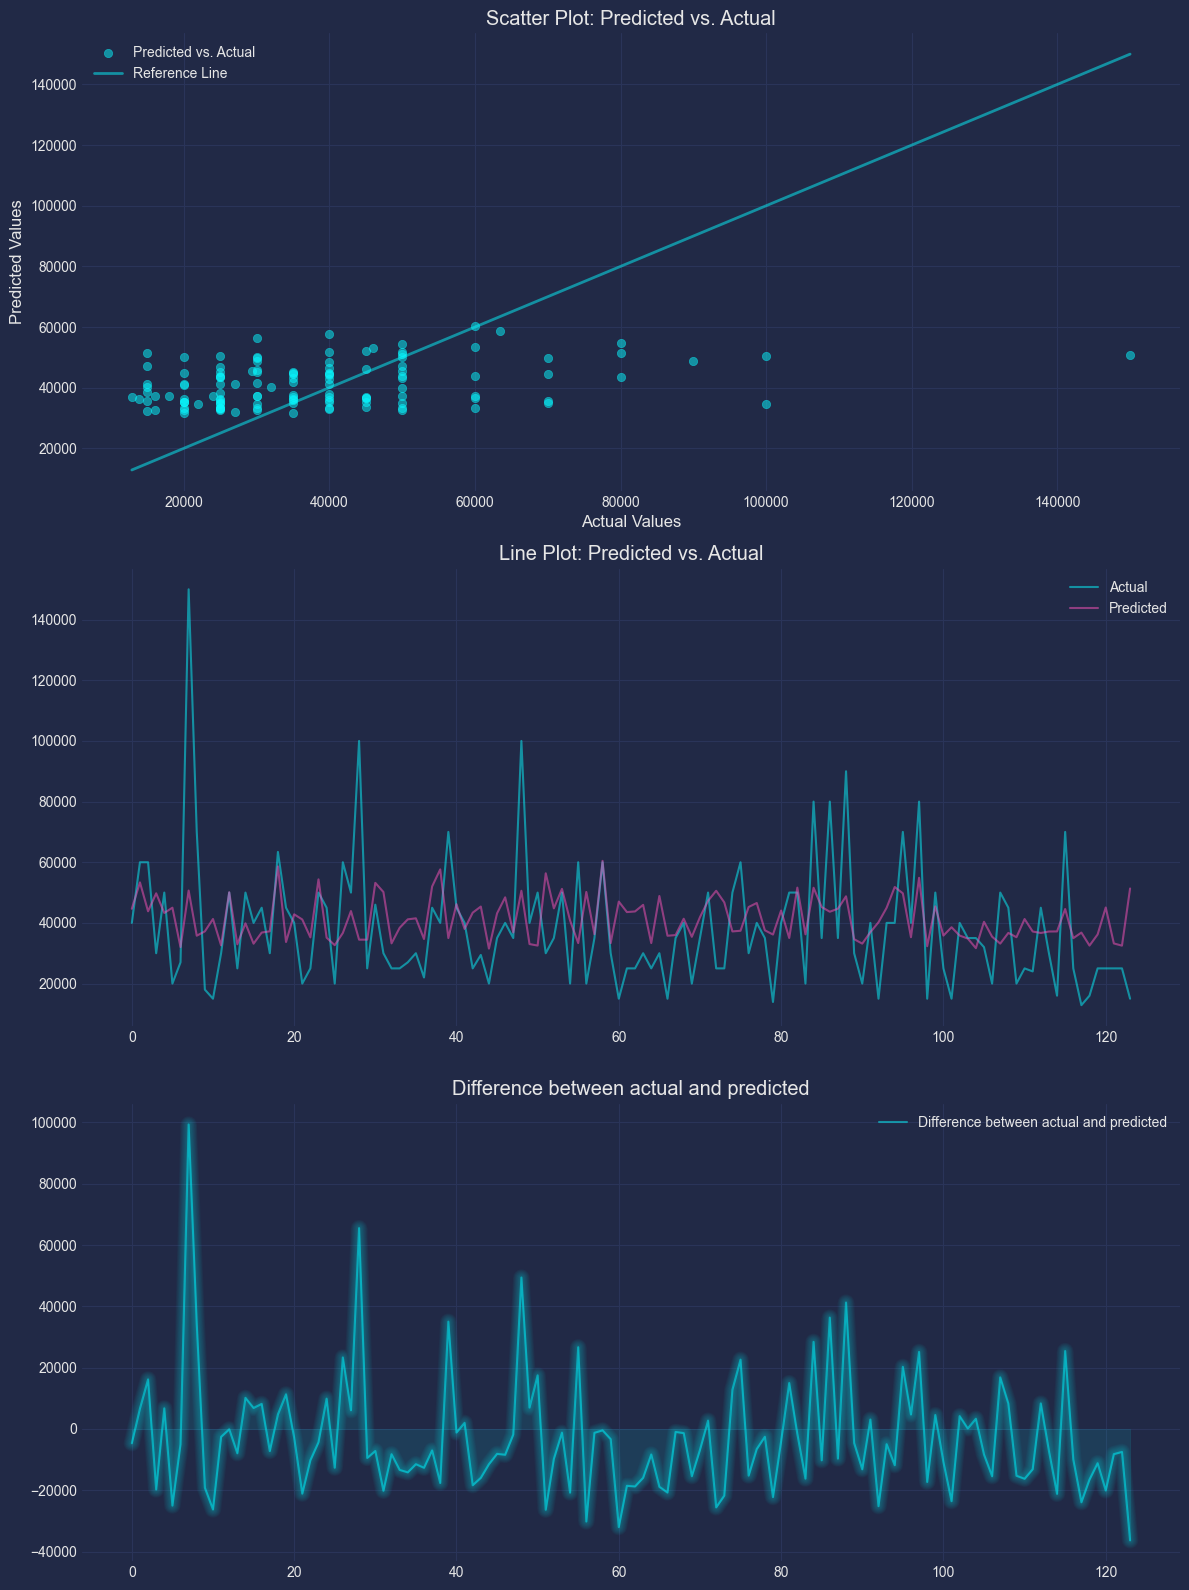

Test set RMSE:  19656.530337902954


In [141]:
model_visualisation(Y_val, predictions, 'catboost')

In [111]:
def objective_small(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        'use_best_model': True,
        'eval_metric': "RMSE"
    }

    model = CatBoostRegressor(**params, silent=True)
    model.fit(X_small_train, Y_small_train, eval_set=[(X_small_val, Y_small_val)])
    predictions = model.predict(X_small_val)
    rmse = mean_squared_error(Y_small_val, predictions)
    return rmse
optuna.logging.set_verbosity(optuna.logging.WARNING)

sampler = TPESampler(seed=1)
study_small = optuna.create_study(study_name="catboost_small", direction="minimize", sampler=sampler)
study_small.optimize(objective_small, n_trials=100)
print('Best hyperparameters:', study_small.best_params)
print('Best RMSE:', study_small.best_value)

Best hyperparameters: {'learning_rate': 0.04119240428181966, 'depth': 5, 'subsample': 0.3005647306927531, 'colsample_bylevel': 0.5440164888022637, 'min_data_in_leaf': 50}
Best RMSE: 387032054.5204169


0:	learn: 30677.6239430	total: 313us	remaining: 62.3ms
1:	learn: 30394.1077472	total: 825us	remaining: 81.7ms
2:	learn: 30109.4850613	total: 1.06ms	remaining: 69.7ms
3:	learn: 29859.7745831	total: 1.34ms	remaining: 65.8ms
4:	learn: 29613.6352464	total: 1.59ms	remaining: 62.2ms
5:	learn: 29493.4595644	total: 1.81ms	remaining: 58.5ms
6:	learn: 29249.0369332	total: 2.02ms	remaining: 55.8ms
7:	learn: 29002.7412863	total: 2.2ms	remaining: 52.8ms
8:	learn: 28824.8107429	total: 2.4ms	remaining: 50.9ms
9:	learn: 28646.1825335	total: 2.67ms	remaining: 50.8ms
10:	learn: 28481.4350458	total: 2.92ms	remaining: 50.1ms
11:	learn: 28253.2829119	total: 3.13ms	remaining: 49.1ms
12:	learn: 28031.2920926	total: 3.51ms	remaining: 50.5ms
13:	learn: 27856.6507736	total: 3.9ms	remaining: 51.8ms
14:	learn: 27671.4928926	total: 4.08ms	remaining: 50.4ms
15:	learn: 27496.5148589	total: 4.25ms	remaining: 48.9ms
16:	learn: 27295.6303232	total: 5.02ms	remaining: 54ms
17:	learn: 27185.0292130	total: 5.21ms	remaining

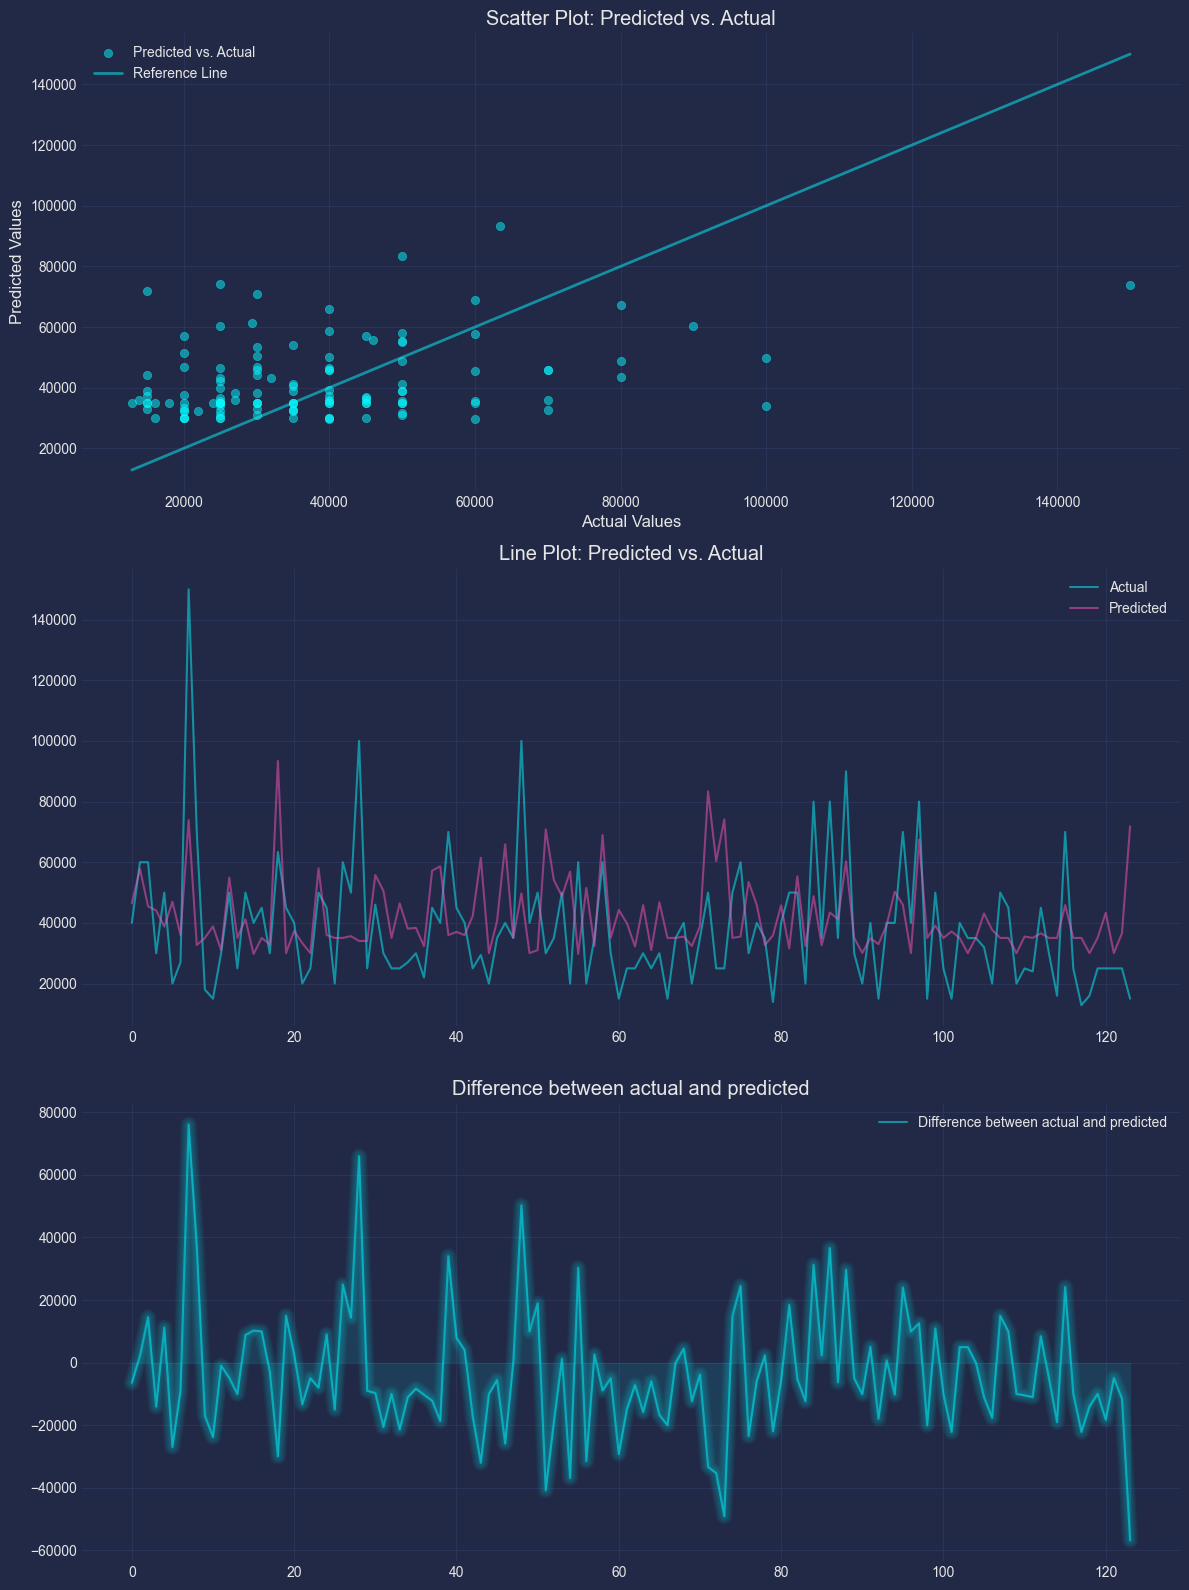

Test set RMSE:  20588.487535494223


In [142]:
catboost_small = CatBoostRegressor(iterations=200,
                             learning_rate=study_small.best_params['learning_rate'],
                             depth=study_small.best_params['depth'],
                             subsample=study_small.best_params['subsample'],
                             colsample_bylevel=study_small.best_params['colsample_bylevel'],
                             min_data_in_leaf=study_small.best_params['min_data_in_leaf'])
catboost_small.fit(X_small_train, Y_small_train)

predictions_small = catboost_small.predict(X_small_val)
model_visualisation(Y_small_val, predictions_small, 'catboost_small')


## From that we can conclude that most parameters are basically useless. Let's narrow the number of columns once more

In [128]:
Y_tiny = data['salary']
X_tiny = data[['english_level', 'n_jobs', 'mean_state_salary', 'education']]
X_tiny_train, X_tiny_val, Y_tiny_train, Y_tiny_val = train_test_split(X_tiny, Y_tiny, test_size=0.3, shuffle=False)


In [130]:
def objective_tiny(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        'use_best_model': True,
        'eval_metric': "RMSE"
    }

    model = CatBoostRegressor(**params, silent=True)
    model.fit(X_tiny_train, Y_tiny_train, eval_set=[(X_tiny_val, Y_tiny_val)])
    predictions = model.predict(X_tiny_val)
    rmse = mean_squared_error(Y_tiny_val, predictions)
    return rmse
optuna.logging.set_verbosity(optuna.logging.WARNING)

sampler = TPESampler(seed=1)
study_tiny = optuna.create_study(study_name="catboost_tiny", direction="minimize", sampler=sampler)
study_tiny.optimize(objective_tiny, n_trials=100)
print('Best hyperparameters:', study_tiny.best_params)
print('Best RMSE:', study_tiny.best_value)

Best hyperparameters: {'learning_rate': 0.05074865306763489, 'depth': 3, 'subsample': 0.81719764363516, 'colsample_bylevel': 0.7901277443454756, 'min_data_in_leaf': 79}
Best RMSE: 392893631.9183013


0:	learn: 30596.2095173	total: 142us	remaining: 28.3ms
1:	learn: 30291.1771435	total: 514us	remaining: 51ms
2:	learn: 30036.9828038	total: 652us	remaining: 42.8ms
3:	learn: 29759.5002458	total: 777us	remaining: 38.1ms
4:	learn: 29588.1023068	total: 908us	remaining: 35.4ms
5:	learn: 29422.5784208	total: 992us	remaining: 32.1ms
6:	learn: 29209.5026554	total: 1.07ms	remaining: 29.5ms
7:	learn: 28994.7364737	total: 1.18ms	remaining: 28.4ms
8:	learn: 28783.4426206	total: 1.28ms	remaining: 27.2ms
9:	learn: 28572.8402000	total: 2.04ms	remaining: 38.8ms
10:	learn: 28374.3229341	total: 2.19ms	remaining: 37.7ms
11:	learn: 28211.2218320	total: 2.29ms	remaining: 35.9ms
12:	learn: 28049.1681778	total: 2.43ms	remaining: 34.9ms
13:	learn: 27918.3178480	total: 2.58ms	remaining: 34.3ms
14:	learn: 27816.4282079	total: 2.69ms	remaining: 33.2ms
15:	learn: 27716.9359071	total: 3.48ms	remaining: 40ms
16:	learn: 27577.9194653	total: 3.57ms	remaining: 38.4ms
17:	learn: 27526.2680630	total: 3.71ms	remaining: 3

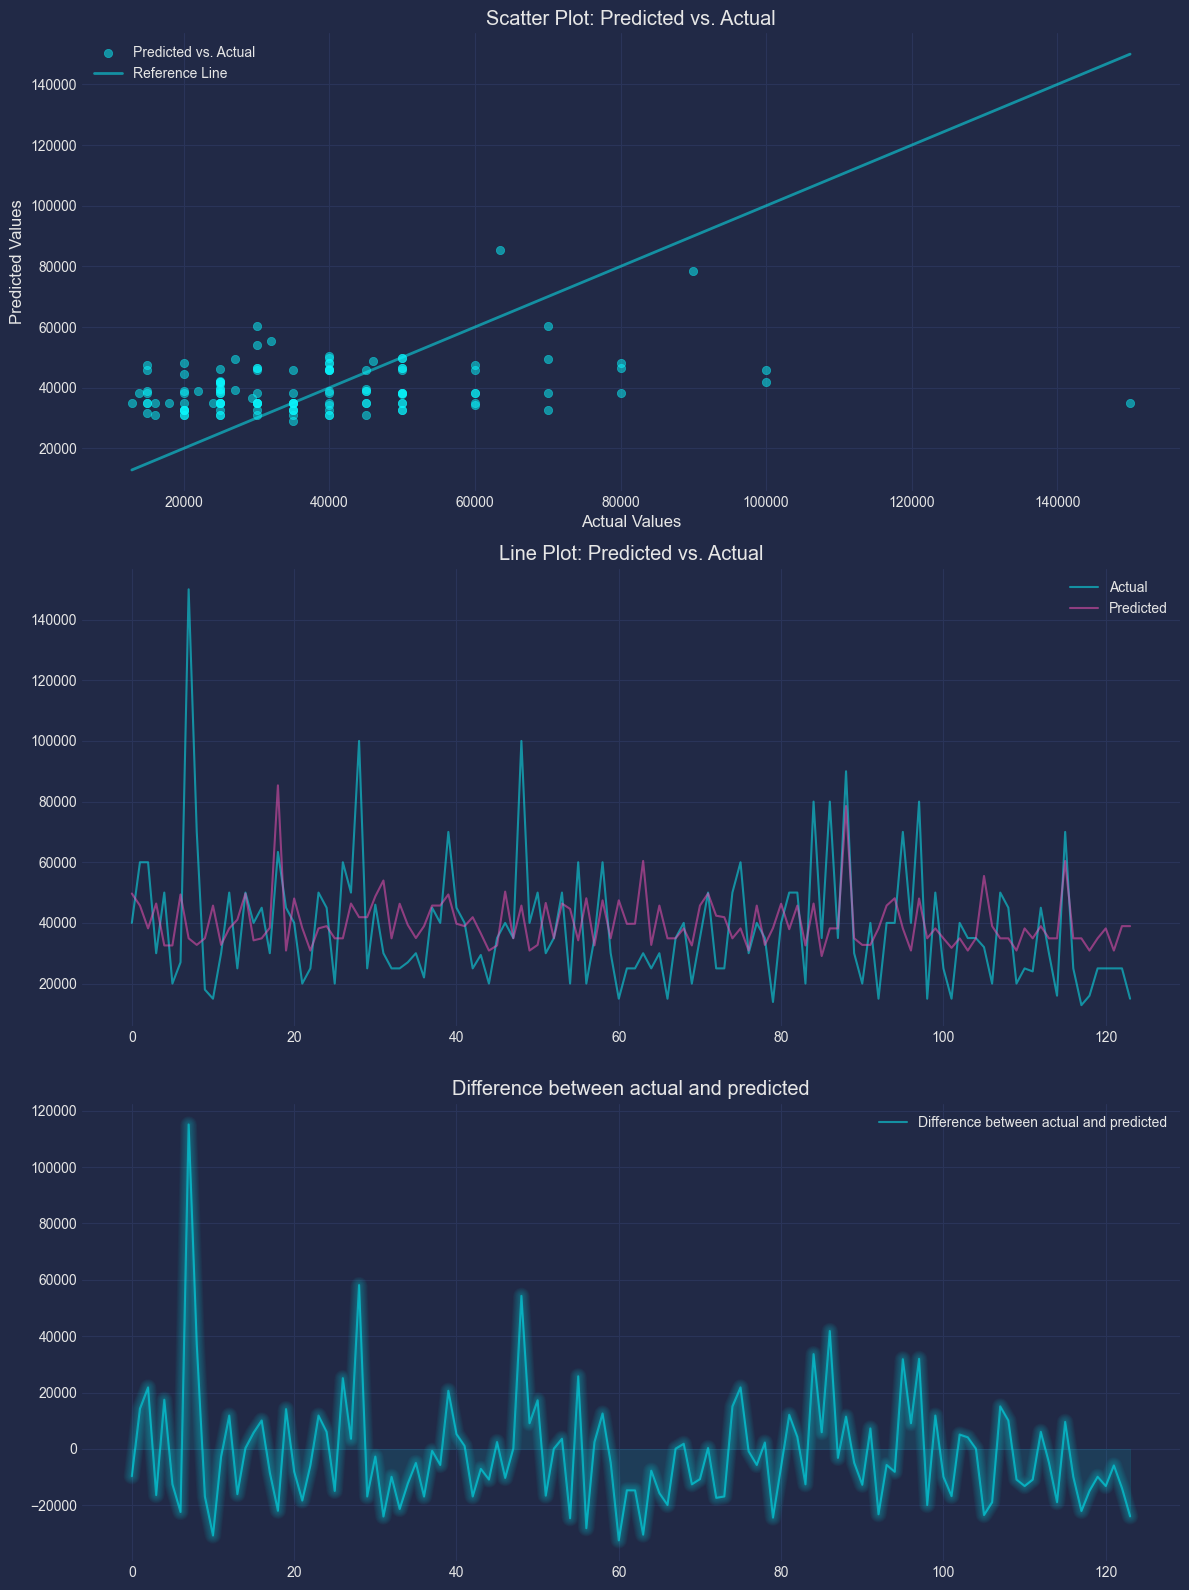

Test set RMSE:  19986.62345777378


In [143]:
catboost_tiny = CatBoostRegressor(iterations=200,
                                   learning_rate=study_tiny.best_params['learning_rate'],
                                   depth=study_tiny.best_params['depth'],
                                   subsample=study_tiny.best_params['subsample'],
                                   colsample_bylevel=study_tiny.best_params['colsample_bylevel'],
                                   min_data_in_leaf=study_tiny.best_params['min_data_in_leaf'])
catboost_tiny.fit(X_tiny_train, Y_tiny_train)

predictions_tiny = catboost_tiny.predict(X_tiny_val)
model_visualisation(Y_tiny_val, predictions_tiny, 'catboost_tiny')


## By looking at those plots I conclude that the size of the data is unsufficent to decently train the model. So plots and models above are the best that we can have. I think the most important features are n_jobs, english_level, education, mean_state_salary, since model performs about the same even after deleting all other columns

## Let's predict my potential salary using the model

In [64]:
my_data = {'mean_state_salary': 59908, 'home_city_code':'7800000000000', 'education':0.7, 'schedule_type':1, 'experience':15, 'professional_skills':1, 'add_skills':1, 'busy_type':1, 'business_trip':1,'retraining_capability':1, 'fullness_rate':84, 'n_jobs':1, 'additionaleducationList':1,  'english_level':1}
me = pd.DataFrame(my_data, index=[0])

In [65]:
me

,mean_state_salary,home_city_code,education,schedule_type,experience,professional_skills,add_skills,busy_type,business_trip,retraining_capability,fullness_rate,n_jobs,additionaleducationList,english_level
0,59908,7800000000000,0.7,1,15,1,1,1,1,1,84,1,1,1


In [81]:
me_predict = catboost.predict(me)

In [83]:
me_predict[0]

61815.988702395705

### It probably overestimates a bit, but I would be fine with that number too ;)

### Thanks for reading through that notebook.
### Made by: Goryachev Alexander
### 27.07.23-01.08.23